Preprocessing
----

When calculating distances, we usually want the features to be measured on thes same scale. One popular way of doing this is to transform each feature so that it has a mean of zero (centering) and a standard devaition of one (scaling). 

In [1]:
x <- matrix(rnorm(20), nrow=5)
colnames(x) <- paste("Feature", 1:4)
rownames(x) <- paste("PDD", 1:5)
x <- matrix(rep(c(1,2,10,100), 5), nrow=5, byrow = TRUE) * x
x

       Feature 1  Feature 2  Feature 3  Feature 4
PDD 1 -0.3108389  0.6213518  6.0957426  -58.59207
PDD 2  1.6342673 -1.0346175 -4.8197955   35.65373
PDD 3  0.7078820 -1.2378908  4.2818411 -122.95305
PDD 4 -0.6726167  2.0712699  0.9734219  142.20661
PDD 5 -0.4537508 -2.1331135  4.8207296   32.28720

#### Pairwise distances

In [2]:
dist(x, method = "euclidean", upper = FALSE)

          PDD 1     PDD 2     PDD 3     PDD 4
PDD 2  94.91019                              
PDD 3  64.42143 158.87054                    
PDD 4 200.86956 106.78037 265.20454          
PDD 5  90.93005  10.48045 155.24811 110.06727

#### Scaling

In [3]:
y <- scale(x, center = TRUE, scale = TRUE)
y

       Feature 1  Feature 2  Feature 3  Feature 4
PDD 1 -0.5070746  0.5749855  0.8711083 -0.6358296
PDD 2  1.4983318 -0.4127800 -1.6145739  0.2959367
PDD 3  0.5432277 -0.5340300  0.4580474 -1.2721380
PDD 4 -0.8800679  1.4398440 -0.2953446  1.3493777
PDD 5 -0.6544169 -1.0680195  0.5807629  0.2626533
attr(,"scaled:center")
 Feature 1  Feature 2  Feature 3  Feature 4 
 0.1809886 -0.3426000  2.2703879  5.7204830 
attr(,"scaled:scale")
  Feature 1   Feature 2   Feature 3   Feature 4 
  0.9699312   1.6764802   4.3913650 101.1474590 

In [4]:
apply(y, MARGIN = 2, FUN = mean)

    Feature 1     Feature 2     Feature 3     Feature 4 
-2.218278e-17  0.000000e+00  0.000000e+00  3.332295e-17 

In [5]:
apply(y, 2, sd)

Feature 1 Feature 2 Feature 3 Feature 4 
        1         1         1         1 

#### Pairwsie distances

In [6]:
dist(y)

         PDD 1    PDD 2    PDD 3    PDD 4
PDD 2 3.470467                           
PDD 3 1.705450 2.771560                  
PDD 4 2.487723 3.455301 3.655392         
PDD 5 1.900723 3.143927 2.022410 2.879033

Dimension reduction
----

### Principal Components Analysis (PCA)

In [7]:
head(iris, 3)

  Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1          5.1         3.5          1.4         0.2  setosa
2          4.9         3.0          1.4         0.2  setosa
3          4.7         3.2          1.3         0.2  setosa

In [8]:
ir <- iris[,1:4]

In [9]:
ir.pca <- prcomp(ir,
                 center = TRUE,
                 scale. = TRUE)

In [10]:
summary(ir.pca)

Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.7084 0.9560 0.38309 0.14393
Proportion of Variance 0.7296 0.2285 0.03669 0.00518
Cumulative Proportion  0.7296 0.9581 0.99482 1.00000

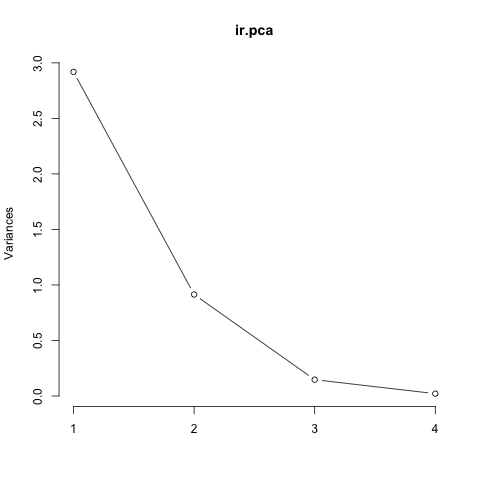

In [11]:
plot(ir.pca, type="l")

In [12]:
options(warn=-1)
suppressMessages(install.packages("devtools",repos = "http://cran.r-project.org"))
library(devtools)
suppressMessages(install_github("vqv/ggbiplot"))
library(ggbiplot)
options(warn=0)


The downloaded binary packages are in
	/var/folders/bh/x038t1s943qftp7jzrnkg1vm0000gn/T//RtmpajHJC2/downloaded_packages


Loading required package: ggplot2
Loading required package: plyr
Loading required package: scales
Loading required package: grid


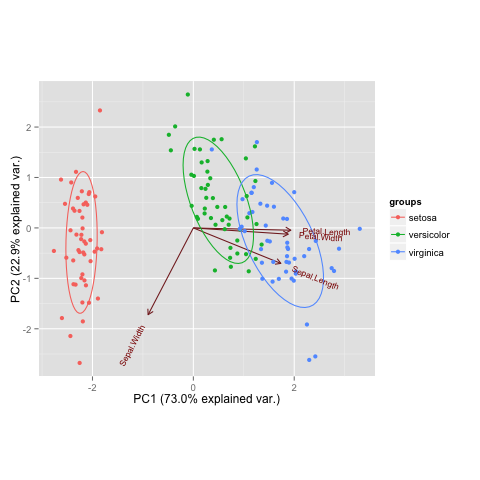

In [13]:
ggbiplot(ir.pca, groups = iris$Species, var.scale=1, obs.scale=1, ellipse = TRUE)

### Classic Multi-Dimensional Scaling

In [14]:
ir.mds <- cmdscale(dist(ir), k = 2)

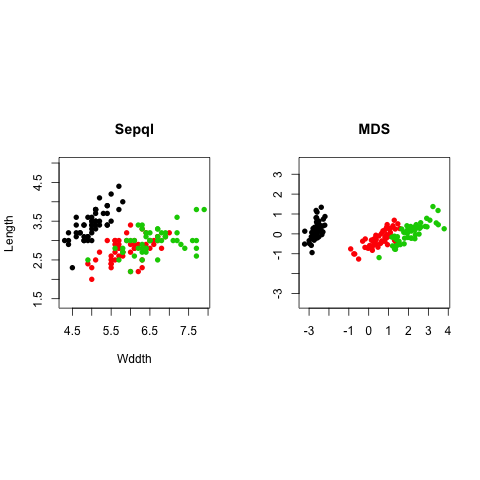

In [15]:
par(mfrow=c(1,2), pty="s")
plot(iris[,1], iris[,2], type = "p", asp = 1, col=iris$Species, pch=16, main="Sepql", xlab="Wddth", ylab="Length")
plot(ir.mds[,1], ir.mds[,2], type = "p", asp = 1, col=iris$Species, pch=16, main="MDS", xlab="", ylab="")

Clustering
----

### k-means clustering

In [16]:
ir.kmeans <- kmeans(ir, centers=3)

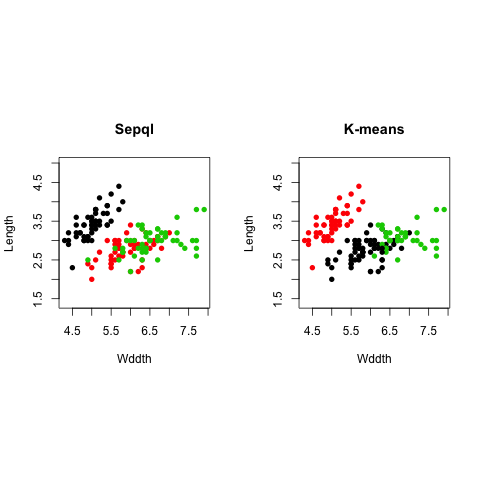

In [17]:
par(mfrow=c(1,2), pty="s")
plot(iris[,1], iris[,2], type = "p", asp = 1, col=iris$Species, pch=16, main="Sepql", xlab="Wddth", ylab="Length")
plot(iris[,1], iris[,2], type = "p", asp = 1, col=ir.kmeans$cluster, pch=16, 
     main="K-means", xlab="Wddth", ylab="Length")

### Agglomerative Hiearchical Clustering

In [18]:
ir.ahc <- hclust(dist(ir), method = "complete")

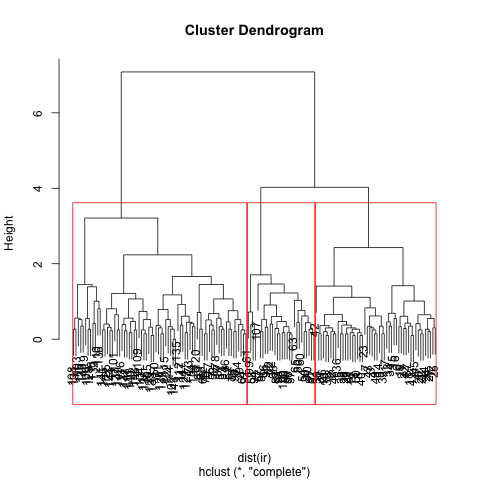

In [19]:
plot(ir.ahc)
rect.hclust(ir.ahc, k=3, border = "red")

In [20]:
groups <- cutree(ir.ahc, k=3)

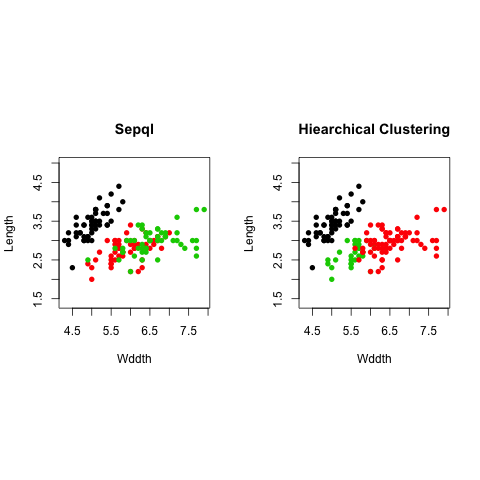

In [21]:
par(mfrow=c(1,2), pty="s")
plot(iris[,1], iris[,2], type = "p", asp = 1, col=iris$Species, pch=16, main="Sepql", xlab="Wddth", ylab="Length")
plot(iris[,1], iris[,2], type = "p", asp = 1, col=groups, pch=16, 
     main="Hiearchical Clustering", xlab="Wddth", ylab="Length")

Heatmaps
----

Heatmaps are a grpahical means of displaying the results of agglomerative hierarchical clustering and a matrix of values (e.g. gene expression).

In [22]:
library(pheatmap)

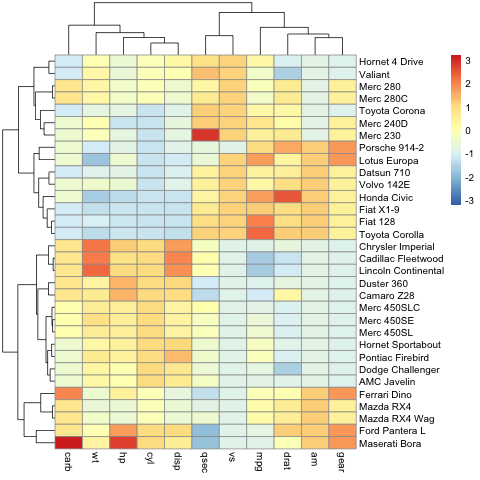

In [23]:
pheatmap(mtcars, scale="column")